<a href="https://colab.research.google.com/github/stepsbtw/Machine-Learning/blob/main/AM_T1_CAIO_PASSOS_TORKST_FERREIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Predição de pagamento de empréstimos (2 pts)

Uma instituição financeira (fictícia) possui uma base de dados com o histórico de crediário oferecido aos seus clientes. Baseado neste histórico, a instituição deseja investigar a criação de modelos de classificação para inferir se um novo cliente que submeteu uma requisição de empréstimo pagará ou não a dívida, caso o banco resolva realizar esse empréstimo. O objetivo é predizer se um novo cliente pagaria ou não uma dívida contraída, tendo como base as características desse novo cliente. Uma vez treinado, um modelo de classificação para esse problema poderá inferir se um novo cliente irá ou não honrar um eventual empréstimo concedido a ele.

O conjunto de dados a ser utilizado para treinamento possui 1500 exemplos, e contém dados relativos a créditos (empréstimos) concedidos aos clientes da instituição financeira. Esses registros estão contidos no arquivo credtrain.txt. É também fornecido um conjunto de exemplos de teste no arquivo credtest.txt. Para cada cliente, são definidos 11 atributos (variáveis preditoras). Além disso, a última coluna de cada arquivo informa se o cliente honrou ou não o pagamento do empréstimo. Na Tabela 1, encontramos a descrição dos atributos.

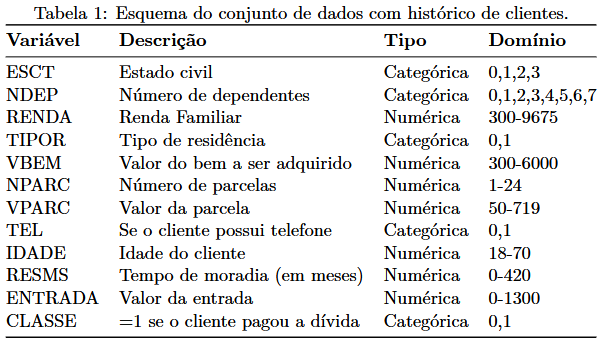

Antes de iniciar o treinamento, é preciso realizar diversos passos de pré-processamento sobre esses dados. Alguns aspectos que você deve levar em contar na sua solução:

- Esse conjunto de dados contém diversos atributos que são categóricos. Modelos de AM não podem ser treinados no Scikit-Learn sobre atributos cujos valores são cadeias de caracteres. Sendo assim, você deve tomar providências para codificar numericamente esses atributos de maneira apropriada.

- Dentre os atributos numéricos, há uma grande discrepância entre as suas respectivas faixas de valores. É sabido que diferenças grandes entre as faixas de valores dos atributos numéricos pode atrapalhar o processo de treinamento de alguns algoritmos de AM.

Após realizar os passos de pré-processamento adequados, você deve criar modelos de classificação por meio dos algoritmos de aprendizado de máquina implementados nas seguintes classes da biblioteca Scikit-Learn. (Por simplicidade, você pode manter os valores default dos hiperparâmetros de cada algoritmo.)

1. sklearn.linear_model.LogisticRegression
2. sklearn.neighbors.KNeighborsClassifier
3. sklearn.ensemble.GradientBoostingClassifier

Construa um gráfico que apresenta a curva ROC para os três algoritmos acima. Use algum dos critérios de escolha de limiar apresentado em aula para definir o limiar de classificação para cada um desses algoritmos.
Após o treinamento e a escolha de limiares adequados, você deve avaliar a qualidade preditiva dos modelos correspondentes. Para isso, você deve usar os exemplos do conjunto de teste.
Isso permitirá que você avalie o quão efetivo foi o passo de treinamento dos modelos, ou seja, qual o poder preditivo de cada modelo de classificação.

- Produza a matriz de confusão (confusion matrix) relativa aos resultados da fase de testes para cada modelo.
- Apresente também o relatório produzido pela função classification_report do Scikit-Learn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/cic1205/refs/heads/main/data/credtrain.txt", sep="\t")
df_test = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/cic1205/refs/heads/main/data/credtest.txt", sep="\t")

colunas = ["ESCT","NDEP","RENDA","TIPOR","VBEM","NPARC","VPARC","TEL","IDADE","RESMS","ENTRADA","CLASSE"]
df_train.columns = colunas
df_test.columns = colunas

df_train.head(-5)

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,0,0,350,1,468,10,65,0,33,6,0,1
1,0,0,1100,0,829,9,125,0,56,48,0,1
2,0,0,3000,0,552,12,76,1,31,60,0,1
3,1,0,1000,0,809,12,111,0,24,7,0,1
4,0,0,300,0,331,6,74,1,41,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1489,0,0,650,0,537,4,160,1,27,36,0,1
1490,0,0,543,0,502,12,68,0,33,48,0,1
1491,1,0,478,0,404,4,121,1,47,180,0,1
1492,0,0,541,1,408,5,100,0,31,6,0,0


**Os atributos categóricos já estão codificados! Mas precisamos tratar os numéricos, a faixa dos valores são muito discrepantes.**

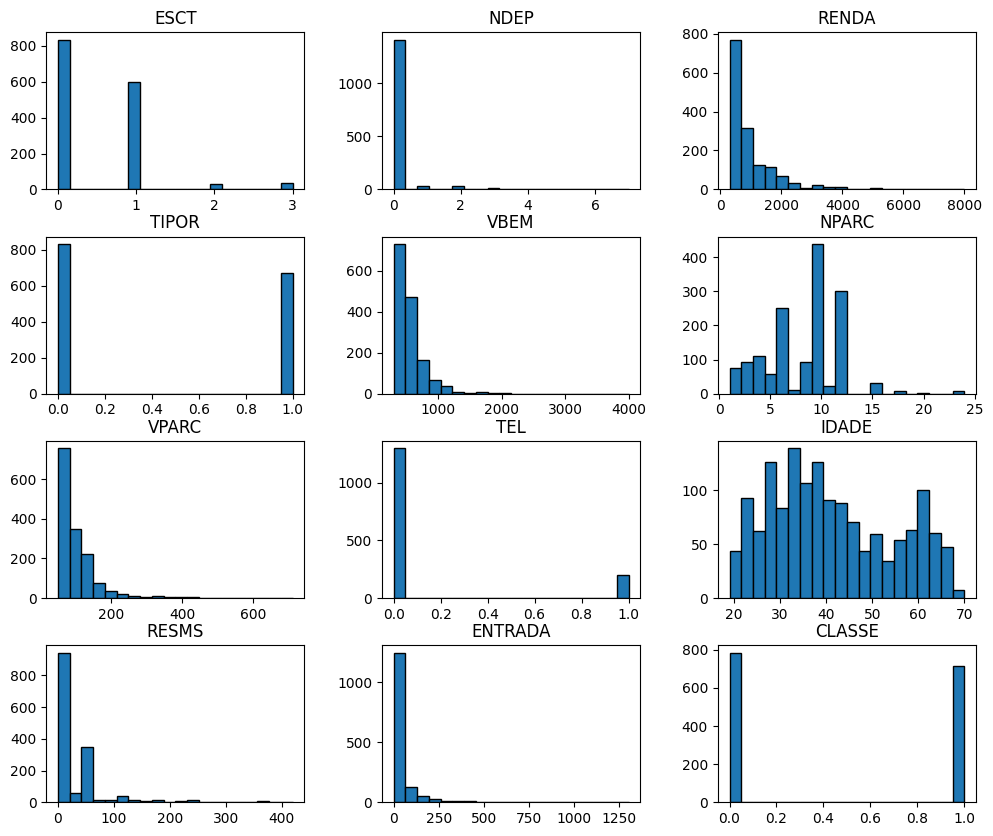

In [ ]:
df_train.hist(figsize=(12,10), edgecolor="black", grid=False, bins=20)
plt.show()

As features VPARC (Valor da Parcela), RENDA, VBEM (Valor do bem), RESMS (Tempo de Moradia) e ENTRADA estão **assimétricas à direita**, podem ser escaladas utilizando **Log Transform**.

As features IDADE e NPARC **parecem se aproximar de uma normal**, aplicaremos um **teste de normalidade**, se passar, podemos efetuar **Standardization**.



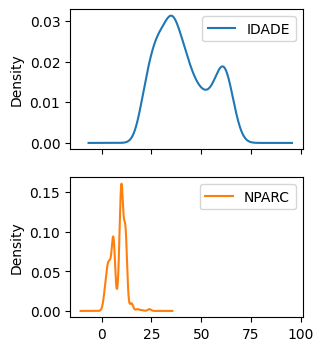

In [ ]:
from seaborn import displot
# Testando os atributos "normais"
df_train_normaltest = df_train[["IDADE","NPARC"]].copy()
df_train_normaltest.plot(kind="kde",subplots=True,figsize=(3,4))
plt.show()

Nenhum teste mostrou normalidade, as features também não apresentam muitos outliers para aplicar RobustScaling. Portanto, utilizaremos o **MinMaxScaling**.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def tratar_dados(df):
  # Tratando os atributos minmax
  scaler = MinMaxScaler()
  df_minmax = df[["IDADE", "NPARC"]].copy()
  df_minmax[["IDADE", "NPARC"]] = scaler.fit_transform(df_minmax[["IDADE", "NPARC"]])

  # Tratando os atributos "skewed"
  df_logT = df[["VPARC","RESMS","RENDA","ENTRADA","VBEM"]].copy()
  df_logT = np.log1p(df_logT)

  # Criando o df_scaled
  df_scaled = df.copy()
  df_scaled[["VPARC","RESMS","RENDA","ENTRADA","VBEM"]] = df_logT
  df_scaled[["IDADE", "NPARC"]] = df_minmax
  return df_scaled

df_train_scaled = tratar_dados(df_train)
df_test_scaled = tratar_dados(df_test)

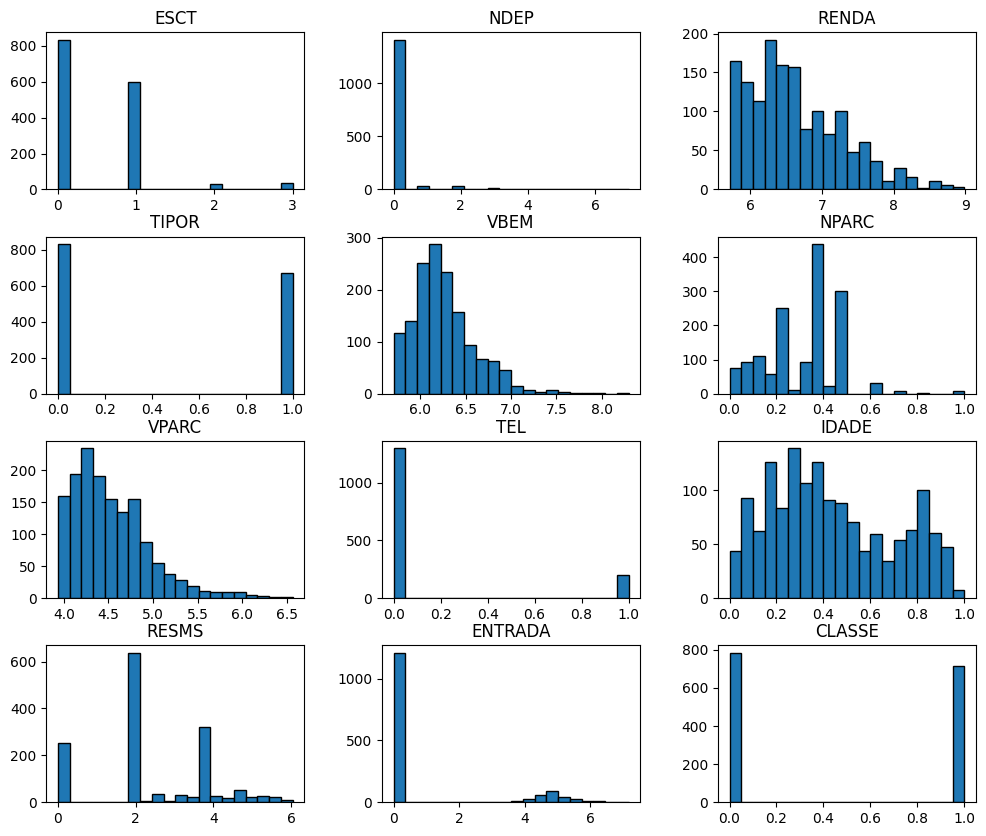

In [ ]:
df_train_scaled.hist(figsize=(12,10), edgecolor="black", grid=False, bins=20)
plt.show()

OK! Todos os atributos escalados de maneira correta.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

logreg = LogisticRegression()
knn = KNeighborsClassifier()
grad = GradientBoostingClassifier()

X_train = df_train_scaled.drop("CLASSE", axis=1)
y_train = df_train["CLASSE"]
X_test = df_test_scaled.drop("CLASSE", axis=1)
y_test = df_test_scaled["CLASSE"]

logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)
grad.fit(X_train, y_train)

print(logreg.score(X_test, y_test))
print(knn.score(X_test, y_test))
print(grad.score(X_test, y_test))

0.8836805555555556
0.8246527777777778
0.8836805555555556


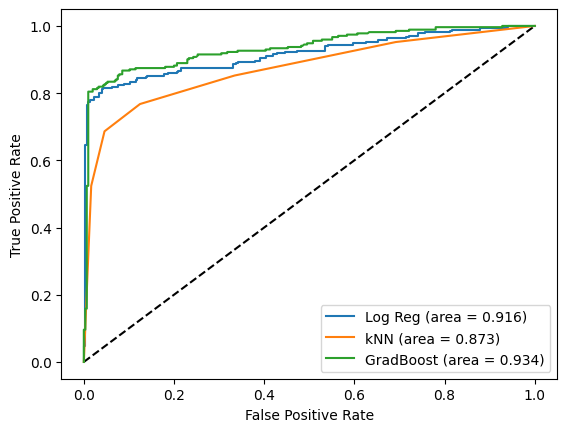

In [ ]:
from sklearn.metrics import f1_score, auc, roc_curve

# predict proba returns probability of being negative or positive. (array)
y_pred_prob_lr = logreg.predict_proba(X_test)[:,1]
y_pred_prob_knn = knn.predict_proba(X_test)[:,1]
y_pred_prob_grad = grad.predict_proba(X_test)[:,1] # taking only positive class probs.

FPR_lr, TPR_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
FPR_knn, TPR_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
FPR_grad, TPR_grad, thresholds_grad = roc_curve(y_test, y_pred_prob_grad)

ROC_AUC_lr = auc(FPR_lr, TPR_lr)
ROC_AUC_knn = auc(FPR_knn, TPR_knn)
ROC_AUC_grad = auc(FPR_grad, TPR_grad)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(FPR_lr, TPR_lr, label='Log Reg (area = %0.3f)' % ROC_AUC_lr)
plt.plot(FPR_knn, TPR_knn, label='kNN (area = %0.3f)' % ROC_AUC_knn)
plt.plot(FPR_grad, TPR_grad, label='GradBoost (area = %0.3f)' % ROC_AUC_grad)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()